# Example of DBSCAN implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


## Data Preparation

In [2]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)


## Application of the DBSCAN method

In [3]:
model = DBSCAN(eps=0.3, min_samples=5)
model.fit(X)
labels = model.labels_.astype(int)


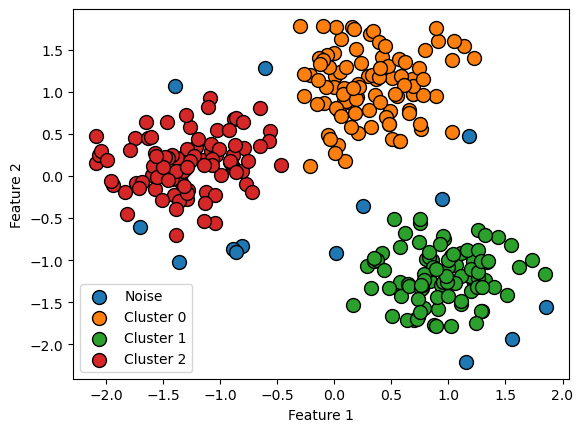

In [4]:
for i in np.unique(labels):
    plt.scatter(X[labels == i, 0], X[labels == i, 1],
                label=i, s=100, edgecolor='black')
plt.legend(['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Correct classless labels

In [5]:
noise_labels = np.where(labels == -1)[0]
umbral = 0.5
for i in noise_labels:
    point = X[i]
    density = np.sum(np.linalg.norm(X - point, axis=1) <= umbral)
    if density > 1:
        distance_to_points = np.linalg.norm(X - point, axis=1)
        neighbors = np.where(distance_to_points <= umbral)[0]
        neighbors_labels = labels[neighbors]
        neighbors_labels = neighbors_labels[neighbors_labels != -1]
        if len(neighbors_labels) > 0:
            new_labels = np.bincount(neighbors_labels).argmax()
            labels[i] = new_labels


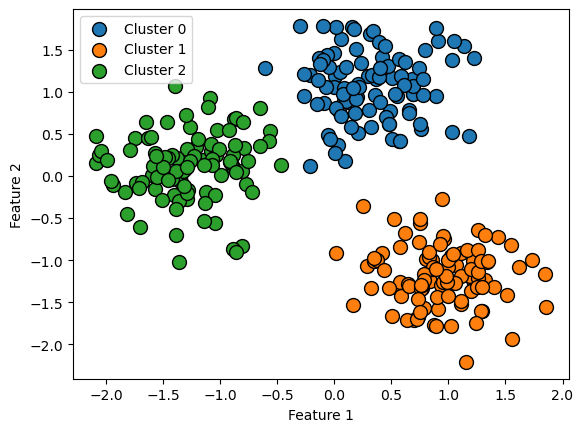

In [6]:
for i in np.unique(labels):
    plt.scatter(X[labels == i, 0], X[labels == i, 1],
                label=i, s=100, edgecolor='black')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [7]:
accuracy = accuracy_score(y, labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 99.67%
